# Analyze vouchers by zipcode 

TK description

In [2]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt

## Data sources

Voucher data: processed in prep-voucher-data.ipynb file. The total number of vouchers here doesn't match up to HUD data, likely due to reporting differences? 
<br>
<br>
Child opportunity index zip code data: https://data.diversitydatakids.org/dataset/coi20_zipcodes-child-opportunity-index-2-0-zip-code-data?_ga=2.107389829.606836181.1655998081-1965355179.1655998081
<br>
Note: it is based on 2015 census data but 2020 zip code boundaries (weighted from census tracts)
<br>
<br>
Top ten eviction zipcodes from 2015-Mar 2020: https://www.azcentral.com/in-depth/money/real-estate/2022/04/22/metro-phoenix-zip-codes-had-most-eviction-filing-2015-2020/6656975001/

In [5]:
#child opportunity index by zip code data
coi = pd.read_csv('/Users/amyqin/Documents/data/source/child_opp_index_2020_zipcodes/2020.csv')

In [6]:
coi.head()

,zip,msaid15,msaname15,statefips,stateusps,pop,aian,api,black,hisp,...,r_se_nat,r_coi_nat,c5_ed_stt,c5_he_stt,c5_se_stt,c5_coi_stt,c5_ed_met,c5_he_met,c5_se_met,c5_coi_met
0,501,35620.0,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36,NY,0.418301,0.000000,0.006080,0.000000,0.162335,...,83,77,Moderate,Moderate,Very High,High,Moderate,Moderate,Very High,High
1,1001,44140.0,"Springfield, MA Metro Area",25,MA,3348.816200,0.000000,182.210360,13.586505,432.109470,...,69,70,Low,Moderate,Moderate,Moderate,Moderate,Moderate,High,High
2,1002,44140.0,"Springfield, MA Metro Area",25,MA,3673.406300,64.088737,432.364650,341.595790,315.291810,...,43,62,High,Low,Low,Low,Very High,Low,Moderate,Moderate
3,1003,44140.0,"Springfield, MA Metro Area",25,MA,88.413177,0.083517,26.126003,19.088234,5.120953,...,9,17,High,Very Low,Very Low,Very Low,Very High,Very Low,Low,Low
4,1004,44140.0,"Springfield, MA Metro Area",25,MA,182.757630,0.000000,0.000000,11.966273,5.076601,...,41,60,High,Very Low,Low,Low,Very High,Low,Moderate,Moderate


## Voucher distribution by zip code

In [3]:
#load data
vouchers = pd.read_csv('/Users/amyqin/Documents/data/processed/vouchers_census_data.csv')

In [4]:
vouchers.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income
0,85003,132,0.192122,48306
1,85004,10,0.282776,52000
2,85006,259,0.296541,43567
3,85007,196,0.312386,35642
4,85008,418,0.210148,46724


In [7]:
vouchers.sort_values('Number of vouchers',ascending=False)

,Zip code,Number of vouchers,pct_below_poverty,median_income
78,85301,621,0.311492,38454
29,85041,568,0.162583,58438
69,85281,474,0.328552,42545
9,85015,463,0.278371,42038
43,85201,429,0.198162,46348
...,...,...,...,...
99,85346,1,0.265263,20611
73,85293,1,NaN,NaN
87,85321,1,0.247315,37418
90,85325,1,0.086614,29696


In [8]:
#descriptive stats
vouchers['Number of vouchers'].mean()

96.68852459016394

In [9]:
vouchers['Number of vouchers'].median()

37.0

In [68]:
#total number of vouchers
vouchers['Number of vouchers'].sum()

11796

In [10]:
vouchers.shape

(122, 4)

The top five voucher zip codes account for roughly one-fifth of all 122 zip codes AKA the top 4% of zip codes account for 20% of all vouchers used.

In [11]:
#add percentage of total vouchers column
vouchers['percent'] = vouchers['Number of vouchers']/vouchers['Number of vouchers'].sum()

In [12]:
vouchers.sort_values('Number of vouchers',ascending=False).iloc[:20,:]

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent
78,85301,621,0.311492,38454,0.052645
29,85041,568,0.162583,58438,0.048152
69,85281,474,0.328552,42545,0.040183
9,85015,463,0.278371,42038,0.039251
43,85201,429,0.198162,46348,0.036368
4,85008,418,0.210148,46724,0.035436
61,85251,330,0.103941,71662,0.027976
28,85040,328,0.295270,43127,0.027806
15,85021,320,0.208215,46358,0.027128
70,85282,304,0.133355,61700,0.025771


In [13]:
top_5 = vouchers.nlargest(5, columns='percent')
top_5['percent'].sum()

0.21659884706680232

## Poverty analysis

There is a small correlation between the number of vouchers issued and a zip codes poverty rate. 

Text(0, 0.5, 'pct_below_poverty')

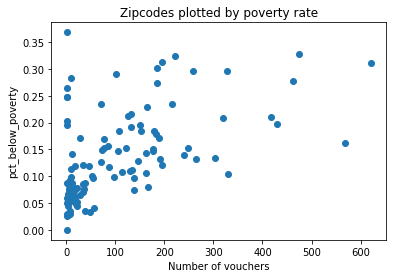

In [14]:
plt.scatter(vouchers['Number of vouchers'],vouchers['pct_below_poverty'])
plt.title('Zipcodes plotted by poverty rate')
plt.xlabel('Number of vouchers')
plt.ylabel('pct_below_poverty')

In [15]:
#pearsons correlation coefficient
vouchers['Number of vouchers'].corr(vouchers['pct_below_poverty'])

0.5443423256089944

Text(0.5, 0, 'pct_below_poverty')

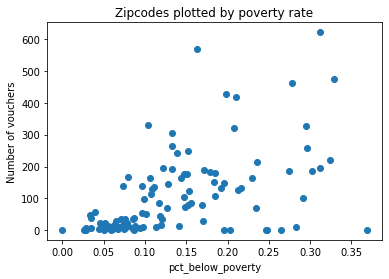

In [16]:
plt.scatter(vouchers['pct_below_poverty'],vouchers['Number of vouchers'])
plt.title('Zipcodes plotted by poverty rate')
plt.ylabel('Number of vouchers')
plt.xlabel('pct_below_poverty')

In [17]:
#pearsons correlation coefficient
vouchers['pct_below_poverty'].corr(vouchers['Number of vouchers'])

0.5443423256089943

The top five zip codes (top 4%) in terms of poverty rate account for 13% of all the vouchers issued in the metro phoenix area.
<br>
The top 10 zip codes (top 8%) in terms of poverty rate account for 20% of all the vouchers issued in the metro phoenix area. AKA the top zip voucher zip codes have disproportionate rates of people who live below the poverty line. 

In [18]:
vouchers.sort_values('pct_below_poverty',ascending=False).iloc[:10,:]

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent
93,85337,1,0.368362,41278,0.000085
69,85281,474,0.328552,42545,0.040183
25,85034,222,0.324369,33140,0.018820
3,85007,196,0.312386,35642,0.016616
78,85301,621,0.311492,38454,0.052645
11,85017,186,0.301794,41893,0.015768
2,85006,259,0.296541,43567,0.021957
28,85040,328,0.295270,43127,0.027806
5,85009,101,0.291377,38228,0.008562
1,85004,10,0.282776,52000,0.000848


In [19]:
top_5_poverty = vouchers.nlargest(5, columns='pct_below_poverty')
top_5_poverty['percent'].sum()

0.12834859274330282

In [20]:
top_10_poverty = vouchers.nlargest(10, columns='pct_below_poverty')
top_10_poverty['percent'].sum()

0.20328925059342148

## Evictions analysis

In [23]:
#load evictions data
evictions = pd.read_csv('/Users/amyqin/Documents/data/manual/top_eviction_zipcodes.csv', header=0)

In [24]:
evictions

,zipcode,filings
0,85301,14245
1,85035,11165
2,85281,11141
3,85008,8259
4,85225,8081
5,85201,8004
6,85202,7802
7,85033,7781
8,85021,7771
9,85029,7733


In [44]:
vouchers_sorted = vouchers.sort_values('Number of vouchers',ascending=False)

In [45]:
#add rank column, method=max_rank which means rows with same value are ranked with the lowest rank
vouchers_sorted['max_rank'] = vouchers_sorted['Number of vouchers'].rank(method='max',ascending=False)

In [50]:
vouchers_sorted.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent,max_rank
78,85301,621,0.311492,38454,0.052645,1.0
29,85041,568,0.162583,58438,0.048152,2.0
69,85281,474,0.328552,42545,0.040183,3.0
9,85015,463,0.278371,42038,0.039251,4.0
43,85201,429,0.198162,46348,0.036368,5.0


In [51]:
#merge evictions data
vouchers_evictions = pd.merge(vouchers_sorted,evictions,how='left',left_on='Zip code',right_on='zipcode')

In [53]:
vouchers_evictions.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.052645,1.0,85301.0,14245.0
1,85041,568,0.162583,58438,0.048152,2.0,NaN,NaN
2,85281,474,0.328552,42545,0.040183,3.0,85281.0,11141.0
3,85015,463,0.278371,42038,0.039251,4.0,NaN,NaN
4,85201,429,0.198162,46348,0.036368,5.0,85201.0,8004.0


The zipcode with the highest evictions is also the zip code with the most number of vouchers used. All of the top evicting zipcodes (minus one from Chandler) are in the top 40 zipcodes that recieve vouchers. 

In [57]:
#top 10 eviction zipcodes sorted by most evictions to least
#missing one eviction zipcode, 85225
top_9 = vouchers_evictions.dropna().sort_values('filings',ascending=False)

In [58]:
top_9

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent,max_rank,zipcode,filings
0,85301,621,0.311492,38454,0.052645,1.0,85301.0,14245.0
27,85035,165,0.229317,45754,0.013988,28.0,85035.0,11165.0
2,85281,474,0.328552,42545,0.040183,3.0,85281.0,11141.0
5,85008,418,0.210148,46724,0.035436,6.0,85008.0,8259.0
4,85201,429,0.198162,46348,0.036368,5.0,85201.0,8004.0
31,85202,150,0.195592,54047,0.012716,32.0,85202.0,7802.0
39,85033,127,0.212580,45492,0.010766,40.0,85033.0,7781.0
8,85021,320,0.208215,46358,0.027128,9.0,85021.0,7771.0
23,85029,179,0.184509,50067,0.015175,24.0,85029.0,7733.0


In [56]:
#85225 is not in my vouchers data because it's a chandler zipcode and we never got data back from chandler
vouchers_evictions[vouchers_evictions['Zip code']==85225]

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent,max_rank,zipcode,filings


The top 9 eviciting zip codes account for 24% percent of all vouchers in the Valley.

In [59]:
top_9['percent'].sum()

0.24440488301119026

## Child opportunity analysis

Additional analysis: historical rent data from zillow, evictions

About the Child Opprtunity Index (COI): it is a composite index of neighborhood opportunity published by diversitydatakids.org
<br>
It compares the level of opportunity that neighborhoods provide in a single metric, based on educational, socio-economic, health & environment indicators. Child Opportunity Levels measure 5 categories of opportunity compared on a national basis. 
<br>
<br>
Data Dictionary here: https://data.diversitydatakids.org/dataset/coi20_zipcodes-child-opportunity-index-2-0-zip-code-data/resource/75dd5483-2844-4fe4-85b0-49c8424edafa#dictionary_anchor

In [101]:
#child opportunity index by zip code data
coi = pd.read_csv('/Users/amyqin/Documents/data/source/child_opp_index_2020_zipcodes/2020.csv',)

Relevant columns:
<ul>
    <li>c5_coi_stt: overall child opp levels state normed</li>
    <li>c5_coi_met: overall child opp levels metro normed</li>
</ul>

In [102]:
coi.head()

,zip,msaid15,msaname15,statefips,stateusps,pop,aian,api,black,hisp,...,r_se_nat,r_coi_nat,c5_ed_stt,c5_he_stt,c5_se_stt,c5_coi_stt,c5_ed_met,c5_he_met,c5_se_met,c5_coi_met
0,501,35620.0,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",36,NY,0.418301,0.000000,0.006080,0.000000,0.162335,...,83,77,Moderate,Moderate,Very High,High,Moderate,Moderate,Very High,High
1,1001,44140.0,"Springfield, MA Metro Area",25,MA,3348.816200,0.000000,182.210360,13.586505,432.109470,...,69,70,Low,Moderate,Moderate,Moderate,Moderate,Moderate,High,High
2,1002,44140.0,"Springfield, MA Metro Area",25,MA,3673.406300,64.088737,432.364650,341.595790,315.291810,...,43,62,High,Low,Low,Low,Very High,Low,Moderate,Moderate
3,1003,44140.0,"Springfield, MA Metro Area",25,MA,88.413177,0.083517,26.126003,19.088234,5.120953,...,9,17,High,Very Low,Very Low,Very Low,Very High,Very Low,Low,Low
4,1004,44140.0,"Springfield, MA Metro Area",25,MA,182.757630,0.000000,0.000000,11.966273,5.076601,...,41,60,High,Very Low,Low,Low,Very High,Low,Moderate,Moderate


In [78]:
#break up into metro phoenix and az coi data
#phx_coi = coi[coi['msaname15']=='Phoenix-Mesa-Scottsdale, AZ Metro Area']
#az_coi = coi[coi['stateusps']=='AZ']

In [97]:
print(coi.columns.tolist())

['zip', 'msaid15', 'msaname15', 'statefips', 'stateusps', 'pop', 'aian', 'api', 'black', 'hisp', 'white', 'other2', 'z_ed_nat', 'sd_z_ed_nat', 'z_he_nat', 'sd_z_he_nat', 'z_se_nat', 'sd_z_se_nat', 'z_coi_nat', 'sd_z_coi_nat', 'c5_ed_nat', 'c5_he_nat', 'c5_se_nat', 'c5_coi_nat', 'r_ed_nat', 'r_he_nat', 'r_se_nat', 'r_coi_nat', 'c5_ed_stt', 'c5_he_stt', 'c5_se_stt', 'c5_coi_stt', 'c5_ed_met', 'c5_he_met', 'c5_se_met', 'c5_coi_met']


In [104]:
vouchers_coi = pd.merge(vouchers, coi[['zip','c5_coi_stt', 'c5_coi_met']], how='left', left_on='Zip code', right_on='zip')
vouchers_coi = vouchers_coi.drop('zip', axis=1)

In [109]:
vouchers_coi.head()

,Zip code,Number of vouchers,pct_below_poverty,median_income,percent,c5_coi_stt,c5_coi_met
0,85003,132,0.192122,48306,0.011190,Very Low,Very Low
1,85004,10,0.282776,52000,0.000848,Low,Low
2,85006,259,0.296541,43567,0.021957,Very Low,Very Low
3,85007,196,0.312386,35642,0.016616,Very Low,Very Low
4,85008,418,0.210148,46724,0.035436,Very Low,Very Low


In [110]:
#vouchers by statewide COI levels
vouchers_coi.groupby('c5_coi_stt').agg({'percent':'sum'})

,percent
c5_coi_stt,
High,0.111563
Low,0.283655
Moderate,0.247033
Very High,0.025771
Very Low,0.331129


35% of all voucher holders live in very low opportunity areas. 31% live in low opportunity areas. 66% of all vouchers holders live in low or very low opportunity areas, disproportionate to the overall child population which is about eqaul to 20% for each of the five levels. Only 11% (9% + 2%) live in high or very high opportunity areas. 
<br>
Note: Using metro Phoenix as a COI comparison is more accurate because cost of living, etc. is different across the state which includes more rural regions. 

In [111]:
#vouchers by metro Phoenix COI levels
vouchers_coi.groupby('c5_coi_met').agg({'percent':'sum'})

,percent
c5_coi_met,
High,0.089776
Low,0.313750
Moderate,0.218633
Very High,0.024585
Very Low,0.352068
